# JORGE NAVARRO GONZÁLEZ - MARIO UBIERNA SAN MAMÉS

## Práctica 9 - MODELO DE PREFERENTIAL ATTACHMENT

In [2]:
#Importaciones
import networkx as nx
import matplotlib.pyplot as plt
import random as random
import numpy as np
import itertools as it
from scipy import stats

#### 1 Preferential Attachment model (1999)

In [3]:
def aleatorio(inicio, valor):
    x = np.random.randint(0, inicio)
    while x == valor:
        x = np.random.randint(0, inicio)
    return x

def preferentialAttachment(N, inicio, enlaces):
    G = nx.Graph()
    G.add_edges_from(it.combinations(range(inicio),2))
    nodo_actual = G.number_of_nodes()
    lista = []
    lista_aux = []
            
    #Obtenemos el grado de todos los nodos
    for node in G.nodes:
        for grado in range(G.degree(node)):
            lista.append(node)
    
    #Añadimos el nuevo nodo con sus enlaces
    for i in range(N-inicio):
                
        #G.add_node(nodo_actual) #Añadimos el nodo al grafo
        
        #Añadimos los enlaces para ese nodo
        for enlace in range(enlaces):
            nodo_a_enlazar = random.choice(lista)
            while G.has_edge(nodo_a_enlazar, nodo_actual):
                nodo_a_enlazar = random.choice(lista)
            G.add_edge(nodo_a_enlazar, nodo_actual)
            lista_aux.append(nodo_a_enlazar)
            lista_aux.append(nodo_actual)
            
        lista += lista_aux
        lista_aux = []
            
        nodo_actual += 1
        
    return G

C:\Users\mario\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


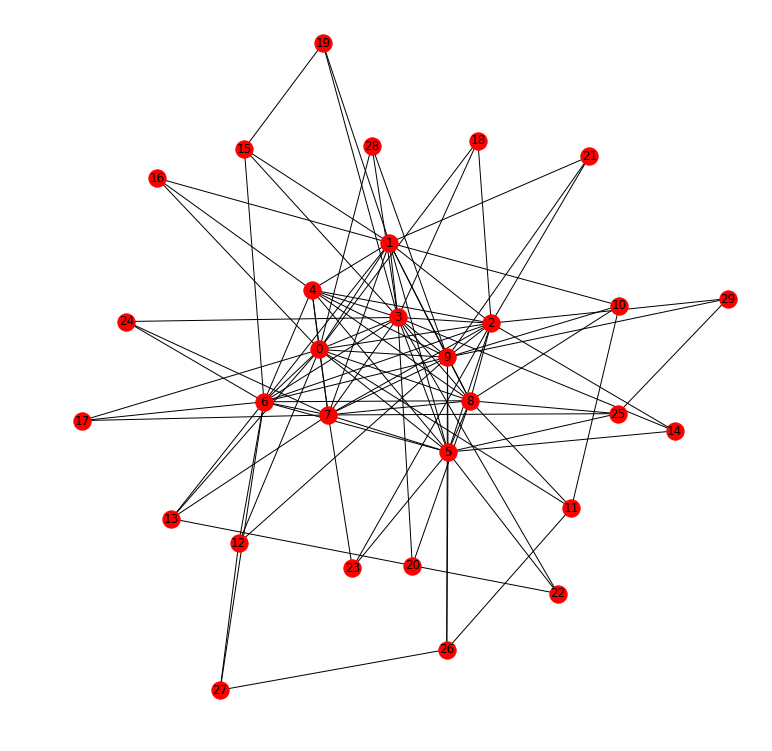

In [4]:
G = preferentialAttachment(30,10,3)
plt.figure(figsize=(10,10))
nx.draw(G, with_labels=True)

#### 2 Distribución de grado

##### 2.1 Represente la distribución de grado de una realización de 1000 nodos del modelo modelo PA(N=1000,mo=3, m=2). Recuerde la función: matplotlib.pyplot.hist()

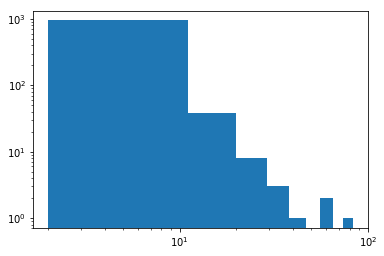

In [19]:
grados_nodos = []
G = preferentialAttachment(1000,3,2)

for nodo in G.nodes():
    grados_nodos.append(G.degree(nodo))
    
plt.hist(grados_nodos, 9)
plt.yscale('log', nonposy = 'clip')
plt.xscale('log')

##### 2.2 (Opcional) Estime mediante el método que quiera el parámetro de la distribución power-law del grado (recuerde los resultados de la práctica de distribuciones de potencia)

##### Estimación parámetro de power law

In [17]:
clases = np.array([2**x for x in range(0,8)])
histograma, bin_enlaces =np.histogram(np.array(grados_nodos), bins=clases)

# Normalizamos
ancho_clase = clases[0:-1]
histograma_normalizado = []
for i in range(0, len(histograma)):
    histograma_normalizado.append(histograma[i]/np.array(ancho_clase[i]))
    
histograma_normalizado  = histograma_normalizado[1:]
clases = clases[1:]

pendiente, intercept, correlacion, pvalor, error = stats.linregress(np.log(clases[:-1]),np.log(histograma_normalizado))
print("Pendiente: " + str(pendiente))
print("El P-Valor: " + str(pvalor))
print("Coeficiente de correlación: "+ str(correlacion))

Pendiente: -2.8091415303435108
El P-Valor: 1.0802589299445704e-05
Coeficiente de correlación: -0.9973151951562204
